# Predict the onset of diabetes based on diagnostic measures


## About the Dataset
    The datasets consist of several medical predictor (independent) variables and one target (dependent) variable,
    Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age,
    and so on.

### Columns
    Pregnancies: Number of times pregnant
    Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test(mg/dL)
    BloodPressure : Diastolic blood pressure (mm Hg)
    SkinThickness : Triceps skin fold thickness (mm)
    Insulin : 2-Hour serum insulin (mu U/ml)
    BMI : Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction : It provided some data on diabetes mellitus history in relatives and the genetic relationship
                               of those relatives to the patient.
    Age : Age (years)
    Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0 , class value 1 is interpreted as "tested positive for diabetes"

### Task:
        To build a machine learning model to accurately predict whether or not the patients in the dataset
        have diabetes or not?


Data Characteristics: 
1. The database contains only data about female patients who are of Pima Indian heritage are 21 or older
2. All the attributes are numeric
3. The data may contain invalid or null values
4. Total number of cases presented are 786
 
Class distribution:
0 : 500    1 : 268 

In [295]:
#importing Libraries
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#for warning 
from warnings import filterwarnings
filterwarnings("ignore")

In [296]:
#Load the dataset
data = pd.read_csv("diabetes.csv")

## Data Exploration

In [297]:
data.shape

(768, 9)

In [298]:
len(data)

768

In [299]:
data.ndim,data.size

(2, 6912)

In [300]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [301]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [302]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [303]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

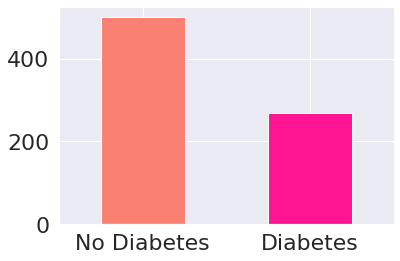

In [304]:
data["Outcome"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);

In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [306]:
#replacing 0 values with NaN
diabetes_data_copy = data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [307]:
diabetes_data_copy.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [308]:
print(diabetes_data_copy.isnull().sum())  #This function indicates gives a column wise sum of missing values(NaN)
                                          

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


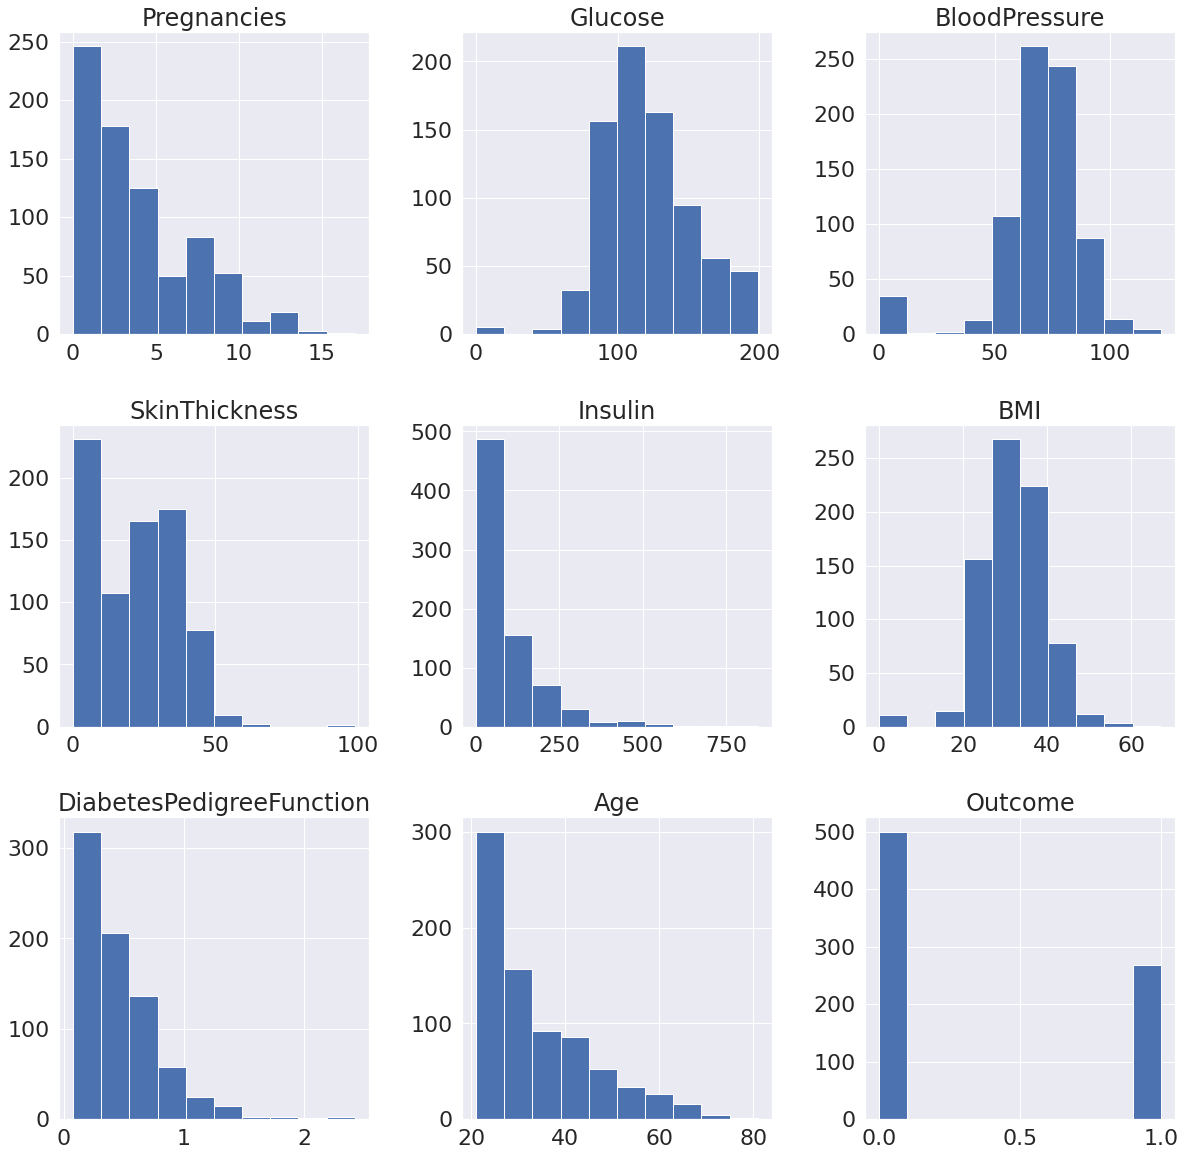

In [309]:
p = data.hist(figsize = (20,20))

Now replacing the NaN values with the mean or median, on the basis of the nature of the distribution curve we obtain. If the curve is skewed towards left or right , we replace it by median, else we replace it by mean.

In [310]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

In [311]:
diabetes_data_copy.shape

(768, 9)

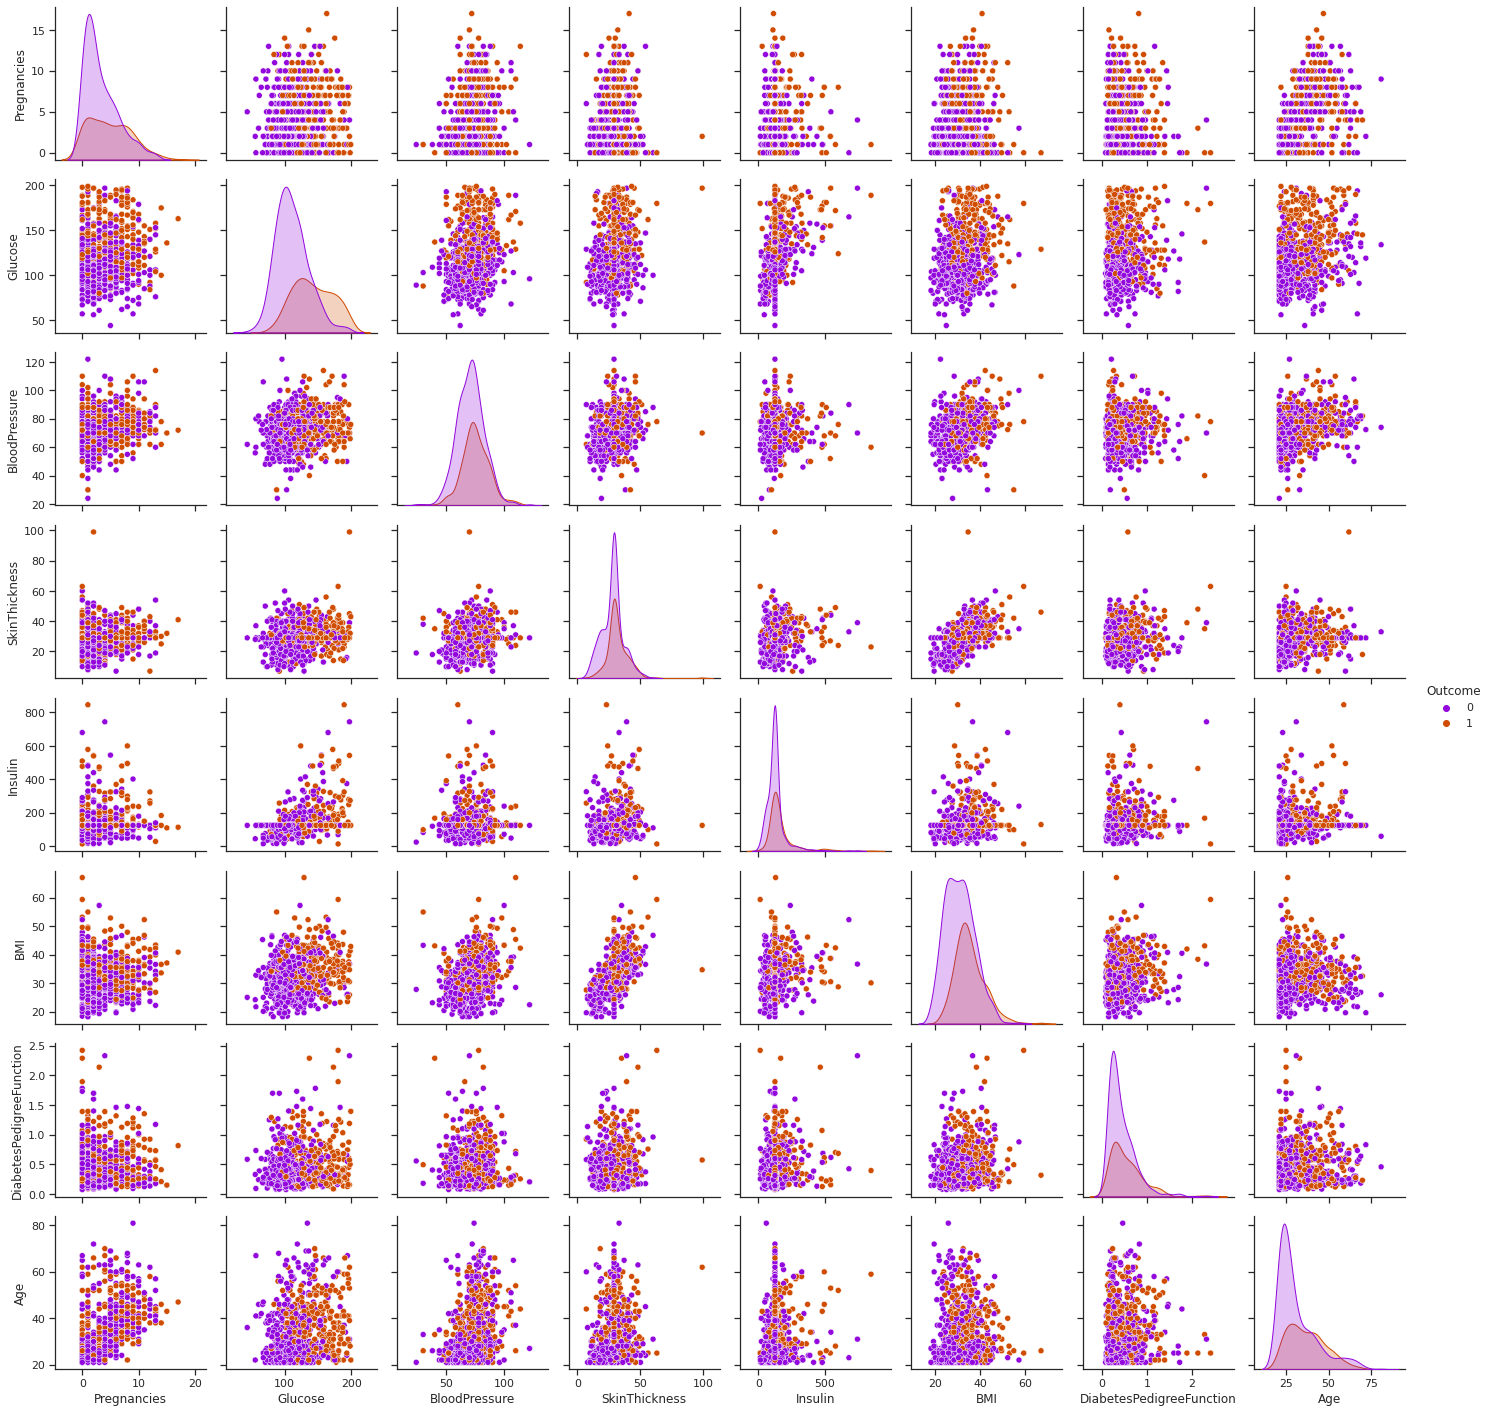

In [312]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(diabetes_data_copy,hue='Outcome',palette='gnuplot');

Over the Pregnancy range, females with high glucose have Diabetes.

Keeping Insulin is kept constant,as Glucose increases, there are higher chances of Diabetes.

Middle aged people with high Glucose level have higher chances of Diabetes which is quite intuitive as well.

Joint plot of Glucose with Other Variables ==> 

Correlation between Glucose and Pregnancies ==>  0.1279114720843187


<Figure size 500x400 with 0 Axes>

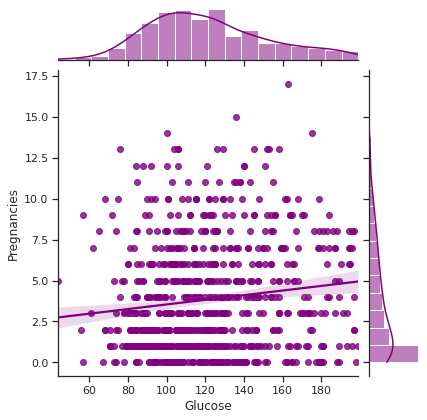

Correlation between Glucose and BloodPressure ==>  0.21836691755561435


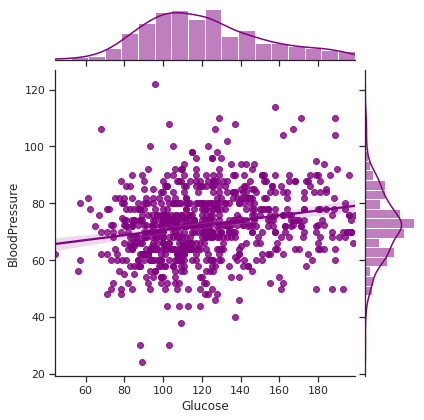

Correlation between Glucose and SkinThickness ==>  0.19268585591450338


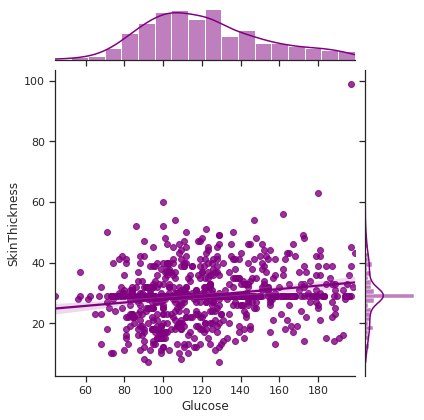

Correlation between Glucose and Insulin ==>  0.4190635368728642


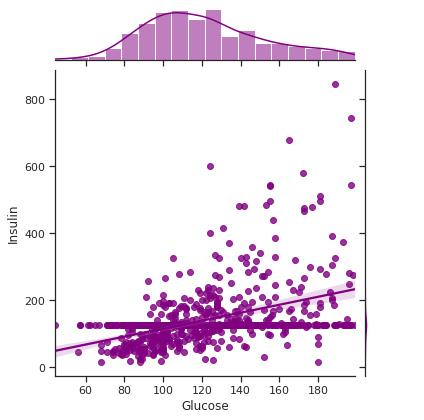

Correlation between Glucose and BMI ==>  0.2311283139568924


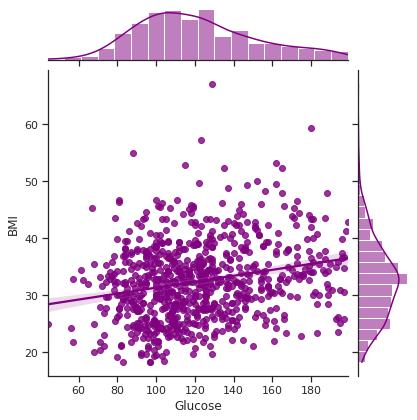

Correlation between Glucose and DiabetesPedigreeFunction ==>  0.13705971047913987


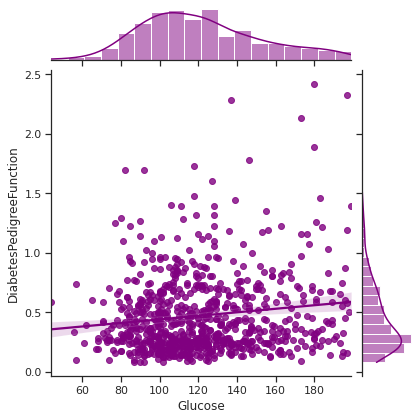

Correlation between Glucose and Age ==>  0.26653351684785326


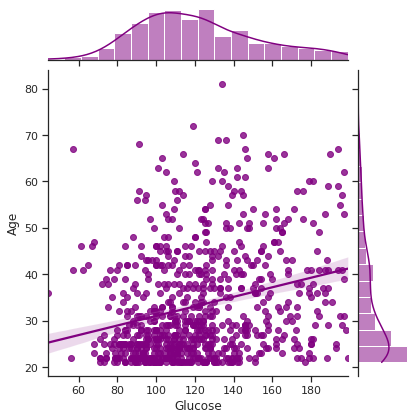

In [313]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of Glucose with Other Variables ==> \n")
for i in  diabetes_data_copy.columns:
    if i != 'Glucose' and i != 'Outcome':
        print(f"Correlation between Glucose and {i} ==> ",diabetes_data_copy.corr().loc['Glucose'][i])
        sns.jointplot(x='Glucose',y=i,data=diabetes_data_copy,kind = 'reg',color = 'purple')
        plt.show()

Weak linear association is good, which is shown in these graphs. That means On increasing Glucose level in patients, Other variables will also increase.



In [314]:
#corelation matrix
diabetes_data_copy.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


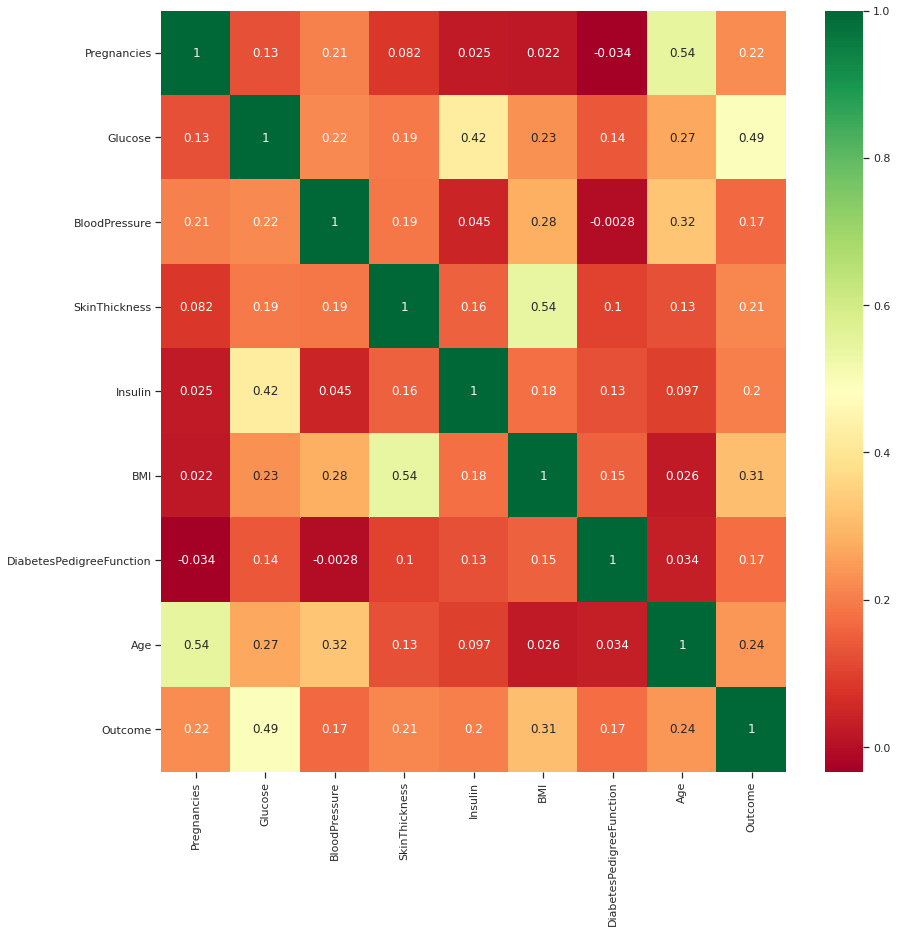

In [315]:
plt.figure(figsize=(14,14))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

**Feature Selection**

Feature selection methods can reduce the number of attributes, which can avoid the redundant features.

Since the correlation of some attributes like **Blood Pressure**, **BMI**, **SkinThickness** with the target variable "**Outcome**" is very less. Therefore, we will drop these attributes.

In [316]:
# Removing column
#list_drop = ['BMI','SkinThickness','BloodPressure']
list_drop = ['BMI','SkinThickness','BloodPressure']
diabetes_data_copy.drop(list_drop, axis=1, inplace=True)

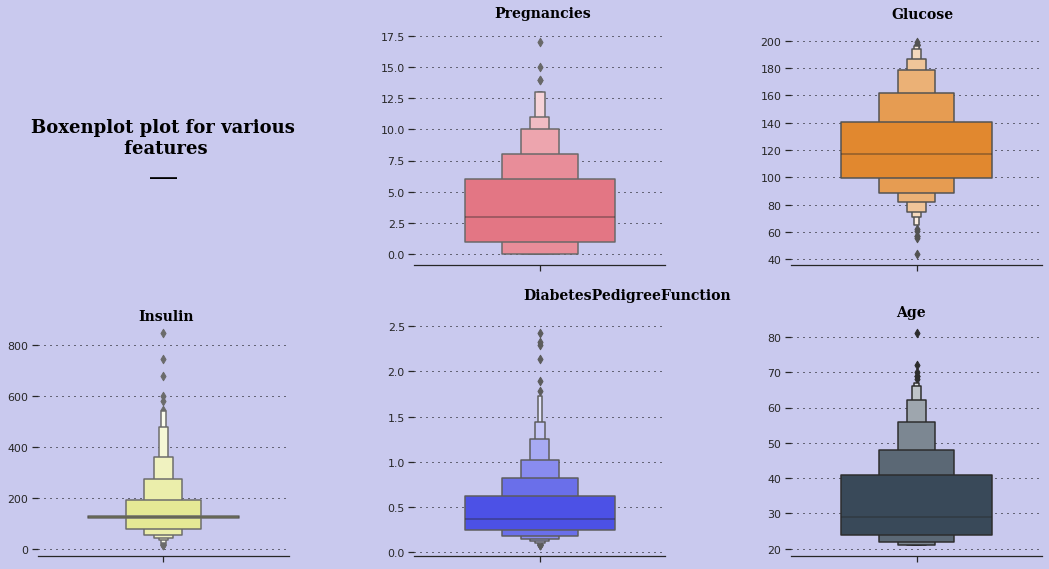

In [317]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
# ax6 = fig.add_subplot(gs[2,0])
# ax7 = fig.add_subplot(gs[2,1])
# ax8 = fig.add_subplot(gs[2,2])

background_color = "#c9c9ee"
# c9c9ee
color_palette = ["#f56476","#ff8811","#ff0040","#ff7f6c","#f0f66e","#990000"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
# ax7.set_facecolor(background_color)
# ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxenplot plot for various\n features\n___',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Pregnancies 
ax1.text(-0.18, 19, 'Pregnancies', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=diabetes_data_copy['Pregnancies'],palette=["#f56476"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Glucose 
ax2.text(-0.1, 217, 'Glucose', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=diabetes_data_copy['Glucose'],palette=["#ff8811"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# # BloodPressure 
# ax3.text(-0.20, 132, 'BloodPressure', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
# ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# sns.boxenplot(ax=ax3,y=diabetes_data_copy['BloodPressure'],palette=["#ff0040"],width=0.6)
# ax3.set_xlabel("")
# ax3.set_ylabel("")

# # SkinThickness 
# ax4.text(-.2, 110, 'SkinThickness', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
# ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# sns.boxenplot(ax=ax4,y=diabetes_data_copy['SkinThickness'],palette=["#ff7f6c"],width=0.6)
# ax4.set_xlabel("")
# ax4.set_ylabel("")

# Insulin 
ax3.text(-0.10, 900, 'Insulin', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=diabetes_data_copy['Insulin'],palette=["#f0f66e"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# BMI 
# ax6.text(-0.08, 77, 'BMI', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
# ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# sns.boxenplot(ax=ax6,y=diabetes_data_copy['BMI'],palette=["#990000"],width=0.6)
# ax6.set_xlabel("")
# ax6.set_ylabel("")

# DPF 
ax4.text(-0.065, 2.8, 'DiabetesPedigreeFunction', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=diabetes_data_copy['DiabetesPedigreeFunction'],palette=["#3339FF"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Age 
ax5.text(-0.08, 86, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=diabetes_data_copy['Age'],palette=["#34495E"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")


for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    # ax6.spines[s].set_visible(False)
    # ax7.spines[s].set_visible(False)
    # ax8.spines[s].set_visible(False)

Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.


Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers.

**On the basis of box plot analysis, Outliers have been removed**

In [318]:
diabetes_data_copy.drop(diabetes_data_copy[diabetes_data_copy["Pregnancies"] > 14].index,inplace=True)
diabetes_data_copy.drop(diabetes_data_copy[diabetes_data_copy["Glucose"] < 50].index,inplace=True)
diabetes_data_copy.drop(diabetes_data_copy[diabetes_data_copy["Insulin"] > 600].index,inplace=True)
diabetes_data_copy.drop(diabetes_data_copy[diabetes_data_copy["DiabetesPedigreeFunction"] > 2].index,inplace=True)
diabetes_data_copy.drop(diabetes_data_copy[diabetes_data_copy["Age"] > 70].index,inplace=True)


In [319]:
diabetes_data_copy.shape

(757, 6)

Ther were about 11 outliers in our data. So after removing them our dataset size has reduced to 757. 


# Modeling

In [320]:
#random data shuffelin
diabetes_data_copy.sample(frac=1)

#Spliting the data
X = diabetes_data_copy.drop("Outcome",axis=1)
y = diabetes_data_copy["Outcome"]
X_train,X_test,y_train,y_test =  train_test_split(X,
                                              y,
                                              test_size=0.2)

In [321]:
(len(X_train),len(X_test))

(605, 152)

# Appling Different Machine Learning Algorithms 
# Training the Model
1.Logistic Regression

2.KNN

3.Random Forest Classifier

4.Support Vector Machine

In [322]:
## Build an model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train);
## Evaluating the model
log_reg = log_reg.score(X_test,y_test)

In [323]:
## Build an model (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
## Evaluating the model
knn = knn.score(X_test,y_test)

In [324]:
## Build an model (Random forest classifier)
clf= RandomForestClassifier()
clf.fit(X_train,y_train);
## Evaluating the model
clf = clf.score(X_test,y_test)

In [325]:
## Build an model (Support Vector Machine)
svm = SVC()
svm.fit(X_train,y_train)
svm = svm.score(X_test,y_test)

In [326]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
                            "KNN":knn,
                            "Random Forest Classifier":clf,
                           "Support Vector Machine":svm,
                            },index=["accuracy"])

In [327]:
model_compare

,Logistic Regression,KNN,Random Forest Classifier,Support Vector Machine
accuracy,0.776316,0.75,0.756579,0.789474


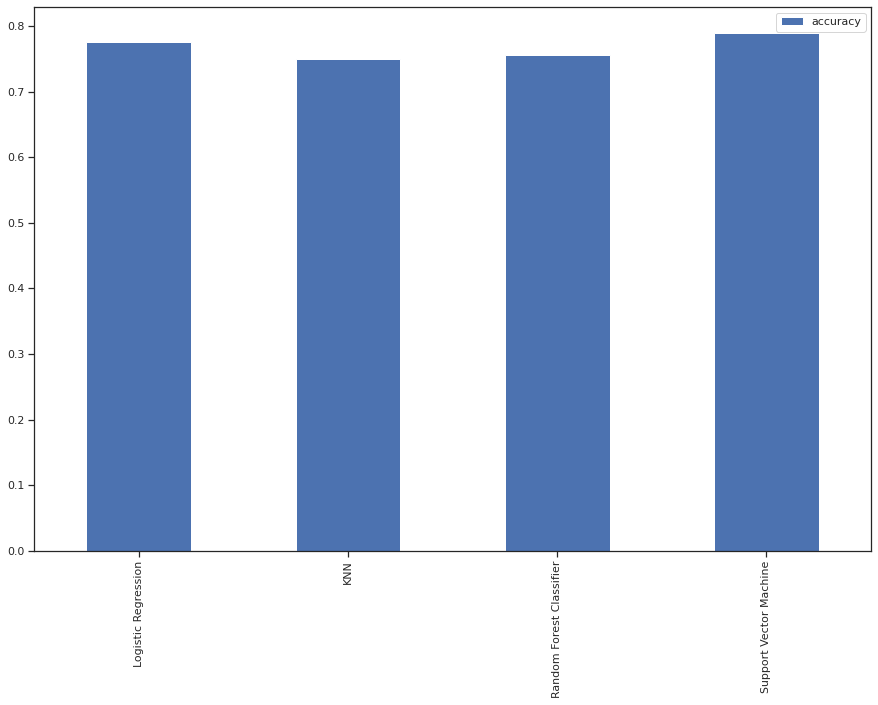

In [328]:
model_compare.T.plot.bar(figsize=(15,10));

Now since the accuracy of **Support Vector Machine** algorithm is highest , we apply hyperpaprameter tuning to the results.

SVM has some hyper-parameters (like what C or gamma values to use) and finding optimal hyper-parameter is a very hard task to solve. But it can be found by just trying all combinations and see what parameters work best. The main idea behind it is to create a grid of hyper-parameters and just try all of their combinations (This method is called GridsearchCV)


**GridSearchCV** takes a dictionary that describes the parameters that could be tried on a model to train it. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.


In [329]:
# Hyperparameter Tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.645, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.645, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.645, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.645, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.645, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.645, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.645, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.645, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.645, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.645, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.645, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.645, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.736, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] 

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [330]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [331]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       105
           1       0.62      0.49      0.55        47

    accuracy                           0.75       152
   macro avg       0.71      0.68      0.69       152
weighted avg       0.74      0.75      0.74       152



Now since the accuracy of the Support Vector Machine decreased from 78% to 75%, this means that the algorithm was trying to overfit the data, which is not a good practise.

Over-fitting is nothing but when your model become highly complex that it starts capturing noise also. This ‘noise’ adds no value to model, but only inaccuracy.

## Hyperparameter tuning using RandomizedSearchcv

In [332]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}


In [333]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [334]:
score = rs_log_reg.score(X_test,y_test)
score

0.7894736842105263

# Best Model is logistic Regression with 78.94% accuracy

Evaluating the tuned model by RandomizedSearchcv

In [335]:
y_preds = rs_log_reg.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

An **ROC curve** (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate

False Positive Rate

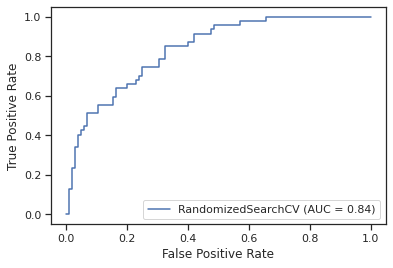

In [336]:
# plot ROC curve
# AUC(Area under the ROC Curve) -measures the entire two-dimensional area underneath the entire ROC curve
# AUC ranges in value from 0 to 1. 
# A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
plot_roc_curve(rs_log_reg,X_test,y_test)

In [337]:
#Confusion matrix
#It gives us gives us a matrix as output and describes the complete performance of the model.
conf_mat=confusion_matrix(y_test,y_preds)
print("The Confusion Matrix  is : \n", conf_mat)

The Confusion Matrix  is : 
 [[96  9]
 [23 24]]


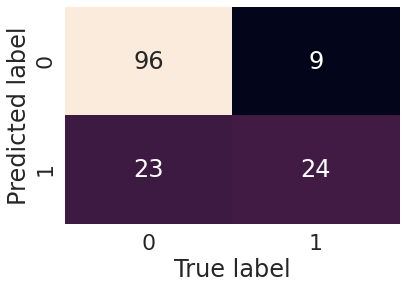

In [338]:
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [339]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [340]:
#accuracy
Accuracy = (true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
print("The accuracy of this logistic regression model is : ",Accuracy)

# Precison
Precision = true_positive/(true_positive+false_positive)
print("The precision of this logistic regression model is : ",Precision)

# Recall
Recall= true_positive/(true_positive+false_negative)
print("The Recall score of logistic regression model is : ",Recall)

# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("The F1_Score for this dataset is : ",F1_Score)

The accuracy of this logistic regression model is :  0.7894736842105263
The precision of this logistic regression model is :  0.9142857142857143
The Recall score of logistic regression model is :  0.8067226890756303
The F1_Score for this dataset is :  0.857142857142857


In [341]:
# Check best hyperparameters
rs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [342]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=4.281332398719396,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [343]:
clf.coef_

array([[0.10921285, 0.0345283 , 0.00106953, 1.01489688, 0.00819895]])

In [344]:
feature_dict = dict(zip(diabetes_data_copy.columns, list(clf.coef_[0])))
feature_dict

{'Age': 0.008198947225651343,
 'DiabetesPedigreeFunction': 1.014896883671962,
 'Glucose': 0.03452830238398351,
 'Insulin': 0.001069533045863815,
 'Pregnancies': 0.10921285281835347}

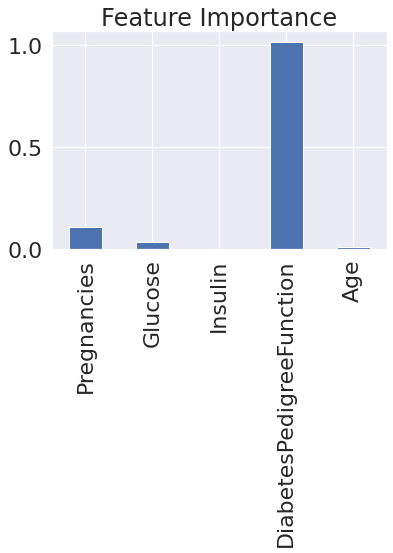

In [345]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

# Loading and Saving a model

In [346]:
# import pickle

# # Save trained model to file
# pickle.dump(rs_log_reg, open("Diabetes1.pkl", "wb"))